CNN

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model # Sequential is a linear stack of layers and Model is a class used to instantiate a Keras model.
from tensorflow.keras.layers import Input, Conv2D, Dense , Flatten, Dropout , GlobalMaxPooling2D, MaxPooling2D, BatchNormalization # Input is used to instantiate a Keras tensor. Conv2D is the 2D convolution layer. Dense is the regular deeply connected neural network layer. Flatten is used to flatten the input. Dropout is used to apply Dropout to the input. GlobalMaxPooling2D is used for global max pooling operation for spatial data. MaxPooling2D is used for max pooling operation for spatial data. BatchNormalization is used to normalize the activations of the previous layer at each batch.
from tensorflow.keras.utils import to_categorical # to_categorical is used to convert a class vector (integers) to binary class matrix.
from tensorflow.keras import regularizers, optimizers # regularizers is used to apply penalties on layer parameters or layer activity during optimization. optimizers is used to apply different optimization algorithms.

In [67]:
from tensorflow.keras.datasets import cifar10 #loading data from keras

In [68]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #loading data from keras
X_train.shape

(50000, 32, 32, 3)

In [69]:
y_train = y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [70]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Text(0.5, 0, 'dog')

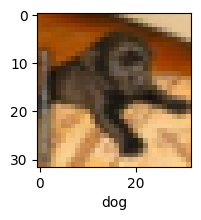

In [71]:
index = int(input("Enter the index of the image: "))

plt.figure(figsize=(3,2))
plt.imshow(X_train[index])
plt.xlabel(classes[y_train[index]])

In [72]:
X_train = X_train / 255 #normalizing the data by dividing by 255
X_test = X_test / 255 #normalizing the data by dividing by 255
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [73]:
# y_train = to_categorical(y_train, 10) #converting the data into categorical data with 10 classes
# y_test = to_categorical(y_test, 10)#converting the data into categorical data with 10 classes
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [74]:
seq = Sequential()  # creating a sequential model
# adding a convolution layer with 32 filters of size 3x3 and relu activation function
seq.add(Conv2D(32, (4, 4), activation='relu', input_shape=(32, 32, 3)))
# adding a maxpooling layer with pool size of 2x2
seq.add(MaxPooling2D(pool_size = (2, 2)))
seq.add(Conv2D(32, (4, 4), activation='relu', input_shape=(32, 32, 3)))
seq.add(MaxPooling2D(pool_size = (2, 2))) # pool_size is the size of the window to take a max over
# adding a flatten layer, which converts the 2D matrix into a 1D vector
seq.add(Flatten())
# adding a dense layer with 128 neurons and relu activation function
seq.add(Dense(128, activation='relu'))
# adding a dense layer with 10 neurons and softmax activation function
seq.add(Dense(10, activation='sigmoid'))
# compiling the model with categorical crossentropy loss function, adam optimizer and accuracy as the metric
seq.compile(loss="sparse_categorical_crossentropy",
            optimizer="Adam", metrics=["accuracy"]) # sparse_categorical_crossentropy is used when the labels are integers and not one-hot encoded


In [75]:
seq.summary() #details of the model architecture and parameters to be trained in the model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [76]:
history = seq.fit(X_train , y_train , epochs = 20 , validation_data = (X_test , y_test), verbose = 1)#validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch.
#epochs is the number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

Epoch 1/20
1563/1563 [==============================] - 176s 93ms/step - loss: 1.5016 - accuracy: 0.4576 - val_loss: 1.2664 - val_accuracy: 0.5419
Epoch 2/20
1563/1563 [==============================] - 107s 69ms/step - loss: 1.1933 - accuracy: 0.5777 - val_loss: 1.1120 - val_accuracy: 0.6032
Epoch 3/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.0552 - accuracy: 0.6309 - val_loss: 1.0423 - val_accuracy: 0.6290
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9653 - accuracy: 0.6627 - val_loss: 0.9962 - val_accuracy: 0.6496
Epoch 5/20
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8877 - accuracy: 0.6890 - val_loss: 0.9737 - val_accuracy: 0.6618
Epoch 6/20
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8266 - accuracy: 0.7101 - val_loss: 0.9825 - val_accuracy: 0.6632
Epoch 7/20
1563/1563 [==============================] - 96s 62ms/step - loss: 0.7698 - accuracy: 0.7306 - val_loss: 0.99

val_accuracy is test data accuracy & accuracy is train data accuracy

In [78]:
seq.evaluate(X_test , y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.3918 - accuracy: 0.6644


[1.3917990922927856, 0.6643999814987183]

In [82]:
y_test = y_test.reshape(-1)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [79]:
y_pred = seq.predict(X_test)
y_pred

313/313 [==============================] - 9s 20ms/step


array([[2.0589698e-02, 3.0091703e-03, 9.6499212e-03, ..., 5.5810316e-03,
        2.3541581e-02, 6.7150921e-07],
       [9.9987561e-01, 9.9992889e-01, 6.6694175e-03, ..., 4.3313744e-07,
        9.9998939e-01, 9.2838079e-01],
       [9.0242034e-01, 9.2626899e-01, 2.5097311e-01, ..., 3.9148021e-02,
        9.8698246e-01, 5.3366739e-01],
       ...,
       [1.3912373e-04, 1.0833549e-08, 9.9906015e-01, ..., 5.6516284e-01,
        1.0930708e-06, 6.1869155e-06],
       [9.5677871e-01, 9.9986494e-01, 9.2236137e-01, ..., 5.3435616e-02,
        4.3425152e-06, 4.0530115e-03],
       [9.7301987e-04, 9.8549690e-06, 3.5201743e-01, ..., 1.0000000e+00,
        1.5994273e-04, 2.7319570e-06]], dtype=float32)

In [83]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 9, 2, 3, 9]

<Figure size 100x100 with 0 Axes>

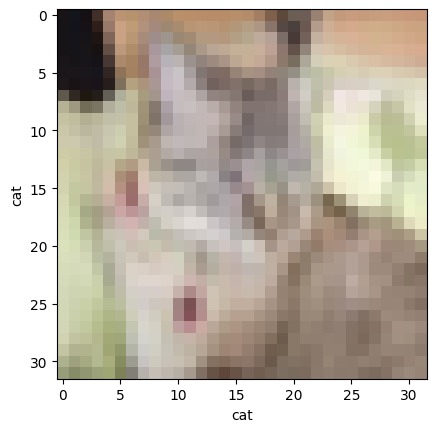

<Figure size 100x100 with 0 Axes>

In [100]:
index = int(input("Enter the index of the image: "))
plt.imshow(X_test[index])
plt.xlabel(classes[y_test[index]])
plt.ylabel(classes[y_classes[index]])
plt.figure(figsize=(1,1))

In [101]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.81      0.75      0.78      1000
           2       0.52      0.61      0.56      1000
           3       0.48      0.48      0.48      1000
           4       0.63      0.56      0.59      1000
           5       0.61      0.53      0.57      1000
           6       0.68      0.77      0.72      1000
           7       0.69      0.73      0.71      1000
           8       0.82      0.73      0.77      1000
           9       0.74      0.75      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

